In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import svd

In [2]:
rawdat = []
with open("choose_compass.txt", "r") as f:
    for line in f.readlines():
        rawdat.append(eval(line[:-1]))

parties = []
for r in rawdat[0]:
    parties += r
    
shorts = ['FVD', 'BBB', 'CDA', 'JA21', 'SGP', 'VVD', '50+', 'CU', 'D66', 'PVV', 'DENK', 'NSC', 'PVDAGL', 'SP', 'VOLT', 'PVDD']

In [3]:
s = {p: np.array([]) for p in parties}
for thesis in rawdat:
    for (i, b) in enumerate(thesis):
        for party in b:
            s[party] = np.append(s[party], i)
            
smat = np.vstack([s[party] for party in s.keys()]).T
smat_norm = np.vstack([(r - np.mean(r))/np.std(r) for r in smat]).T

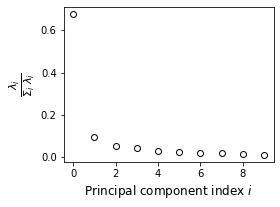

In [4]:
U, s, Vh = svd(smat_norm)
sigma = np.zeros_like(smat_norm)
for i in range(len(s)):
    sigma[i, i] = s[i]
    
fig, ax = plt.subplots(figsize = (4, 3))
lambdas = s**2 / (len(s) - 1)
pct_variance = lambdas / np.sum(lambdas)
ax.plot(pct_variance[:10], marker = "o", ls = "none", markeredgecolor = "k", color = "none")
ax.set_ylabel(r"$\frac{\lambda_i}{\Sigma_i \,\,\lambda_i}$", fontsize = 16)
ax.set_xlabel(r"Principal component index $i$", fontsize = 12)
ax.tick_params(labelsize = 10)
ax.patch.set_facecolor('none')



plt.tight_layout()
plt.savefig("principal_components.svg")

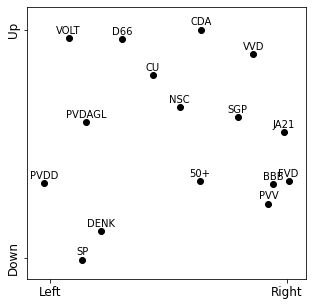

In [5]:
compressed = smat_norm@Vh.T


fig, ax = plt.subplots(figsize = (5, 5))

plt.plot(-compressed[:, 0], -compressed[:, 1],  ls = "none", marker = "o",
        markeredgecolor = "k", color = "k")
for i in range(len(parties)):
    plt.annotate(shorts[i], (-compressed[i, 0], -compressed[i, 1] + 0.2),
                ha = "center", va = "center_baseline")
    
    
ax.set_xlim([-8.25, 7.05])
ax.set_ylim([-3.5, 3.05])
ax.set_xticks([-7, 6])
ax.set_xticklabels(['Left', 'Right'], fontsize = 12)
ax.set_yticks([-3, 2.5])

for tick in ax.yaxis.get_majorticklabels():
    tick.set_verticalalignment("center")

ax.set_yticklabels(['Down', 'Up'], fontsize = 12, rotation = 90)

ax.patch.set_facecolor('none')

plt.savefig("new_compass.svg")

In [6]:
labels = [
"Home ownership > public housing",
"Stop arming Isreal",
"Expand AMS airport",
"Criminalize illegality",
"Free childcare for all",
"Tax polluting companies",
"Reduce public broadcasting",
"Buy out farms to reduce N$_2$",
"Public transit",
"Foreign aid",
"Youth care",
"More nuclear",
"Wealth tax",
"Change gender on docs",
"Housing shortage fault of migrants",
"Teach colonial history",
"More defense spending",
"More copay for healthcare",
"Nature > farms",
"Fewer refugees, despite laws",
"Budget cuts > tax increase",
"Less differentiation in school",
"Minimum wage for everyone >=18",
"Government can forbid organizations",
"Social security linked to minimum wage",
"Ukraine NATO member",
"Gas drilling in North Sea",
"Force redistribution of refugees",
"Stop subsidizing home ownership",
"More EU"
]

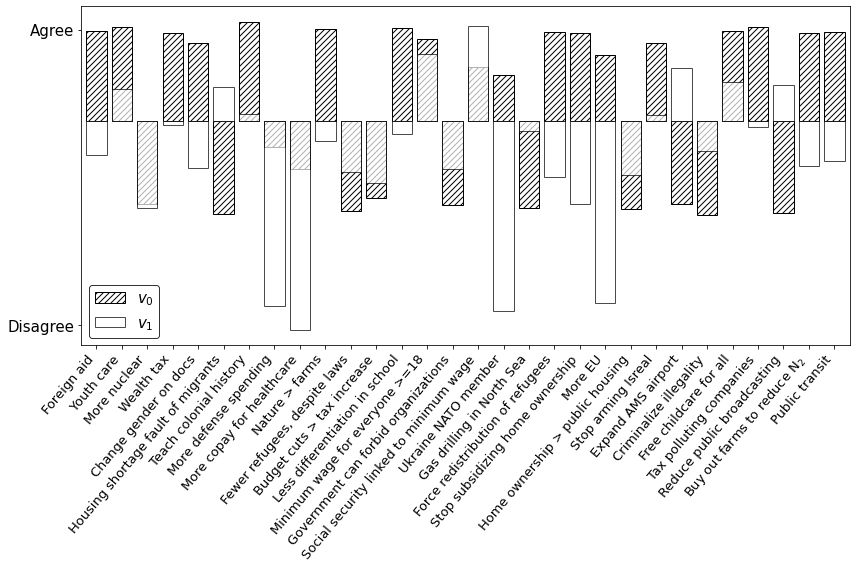

In [7]:
fig, ax = plt.subplots(figsize = (12, 8))

Vv = -np.roll(Vh.T, -9, axis = 0) # Roll and *-1 to make the plot look better
ax.bar(np.arange(30), Vv[:, 0], alpha = 1, hatch = "////", color = "white", ec = "k", label = r"$v_0$")
ax.bar(np.arange(30), Vv[:, 1], alpha = 0.7, hatch = "", color = "white", ec = "k", label = r"$v_1$")


ax.set_yticks([-0.45, 0.2])
ax.set_yticklabels(['Disagree', 'Agree'], fontsize = 15)
ax.set_xticks(np.arange(30))
ax.set_xticklabels(np.roll(labels, -9), rotation = 50, fontsize = 13);
ax.set_xlim([-0.6, 29.6])

for tick in ax.xaxis.get_majorticklabels():
    tick.set_ha("right")
    
for tick in ax.xaxis.get_majorticklabels():
    pos = tick.get_position()
    tick.set_position((pos[0], pos[1]))

l = ax.legend(fontsize = 15, facecolor = "none", edgecolor = "k")
ax.patch.set_facecolor('none')
    
plt.tight_layout()
fig.savefig("principal_vectors.svg")

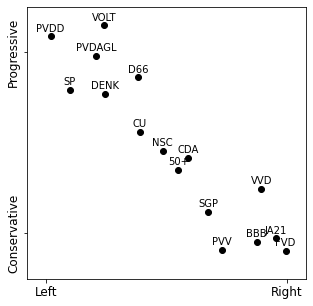

In [8]:
original_compass_x = [0.886792453,0.660377358,0.119496855,0.808176101,0.27672956,0.694968553,0.040880503,-0.264150943,-0.273584906,0.386792453,-0.534591195,-0.081761006,-0.60691823,-0.814465409,-0.540880503,-0.965408805]
original_compass_y = [-0.831939006,-0.766257268,-0.119308967,-0.737722994,-0.531011432,-0.354253194,-0.210627546,0.084490329,0.505859143,-0.826435861,0.376517938,-0.059876983,0.675146355,0.41066908,0.90795459,0.822381433]

fig, ax = plt.subplots(figsize = (5, 5))
ax.plot(original_compass_x, original_compass_y, ls = "none", marker = "o",
        markeredgecolor = "k", color = "k")
for i in range(len(parties)):
    ax.annotate(shorts[i], (original_compass_x[i], original_compass_y[i] + 0.07),
               ha = "center", va = "center_baseline")
    
ax.set_xlim([-1.15, 1.05])
ax.set_ylim([-1.05, 1.05])
ax.set_xticks([-1, 0.9])
ax.set_xticklabels(['Left', 'Right'], fontsize = 12)
ax.set_yticks([-0.7, 0.7])

for tick in ax.yaxis.get_majorticklabels():
    tick.set_verticalalignment("center")

ax.set_yticklabels(['Conservative', 'Progressive'], fontsize = 12, rotation = 90)
ax.patch.set_facecolor('none')

plt.savefig("choose_compass.svg")

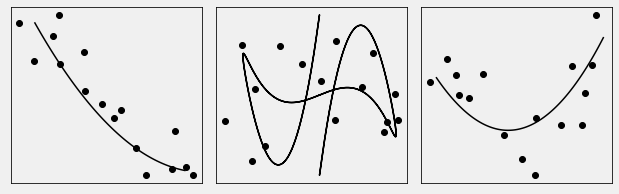

In [9]:
original_compass_x = [0.886792453,0.660377358,0.119496855,0.808176101,0.27672956,0.694968553,0.040880503,-0.264150943,-0.273584906,0.386792453,-0.534591195,-0.081761006,-0.60691823,-0.814465409,-0.540880503,-0.965408805]
original_compass_y = [-0.831939006,-0.766257268,-0.119308967,-0.737722994,-0.531011432,-0.354253194,-0.210627546,0.084490329,0.505859143,-0.826435861,0.376517938,-0.059876983,0.675146355,0.41066908,0.90795459,0.822381433]

fig, ax = plt.subplots(1, 3, figsize = (8.7,2.8))
ax[0].plot(original_compass_x, original_compass_y, ls = "none", marker = "o",
        markeredgecolor = "k", color = "k")

xd = np.linspace(-0.8, 0.8, 100)
yd = -0.3 - xd + 0.5*xd**2
ax[0].plot(xd, yd, c = "k")

ax[1].plot(-compressed[:, 0], -compressed[:, 1],  ls = "none", marker = "o",
        markeredgecolor = "k", color = "k")

r = np.linspace(0, 2*np.pi, 1000)
xr, yr = 7.7, 3.7
xd = xr * np.cos(r) * np.sin(2*r)
yd = yr * np.sin(r) * np.cos(6*r)
ax[1].plot(xd, yd, c = "k")

ax[2].plot(-compressed[:, 0], -compressed[:, 2],  ls = "none", marker = "o",
        markeredgecolor = "k", color = "k")

xd = np.linspace(-6.8, 6.7, 100)
yd = 0.05*xd**2 + 0.1*xd - 1
ax[2].plot(xd, yd, c = "k")

for a in ax:
    a.set_xticks([])
    a.set_yticks([])
    a.patch.set_facecolor('#f0f0f0')

fig.patch.set_facecolor('#f0f0f0')

fig.tight_layout()
plt.savefig("maps.png", dpi = 300)